In [ ]:
# Install ultralytics
!pip install ultralytics

# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load model YOLO11
print("Loading YOLO9 model...")
model = YOLO('yolov9s.pt')
print("✓ Model loaded!\n")

# Training
print("="*60)
print("Starting YOLO9 Training...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/train/yolo9_model")
print("="*60 + "\n")

results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/train',
    name='yolo9_model',
    lr0=0.01,
    patience=50,
    save=True,
    plots=True,
    workers=2,

    # Augmentasi standar
    augment=True,                   # Enable augmentasi
    hsv_h=0.015,                    # Hue augmentation (0.0-1.0)
    hsv_s=0.7,                      # Saturation augmentation (0.0-1.0)
    hsv_v=0.4,                      # Value augmentation (0.0-1.0)
    degrees=0.0,                    # Rotation (+/- deg)
    translate=0.1,                  # Translation (+/- fraction)
    scale=0.5,                      # Scaling (+/- gain)
    shear=0.0,                      # Shear (+/- deg)
    perspective=0.0,                # Perspective (+/- fraction)
    flipud=0.0,                     # Flip up-down (probability)
    fliplr=0.5,                     # Flip left-right (probability)
    mosaic=1.0,                     # Mosaic augmentation (probability)
    mixup=0.0,                      # MixUp augmentation (probability)
    copy_paste=0.0,                 # Copy-paste augmentation (probability)

    # Normalisasi otomatis dihandle oleh YOLO (ImageNet mean & std)
    # mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)

print("\n" + "="*60)
print("✓ TRAINING SELESAI!")
print("="*60)
print(f"✓ Best model : {OUTPUT_PATH}/runs/train/yolo9_model/weights/best.pt")
print(f"✓ Last model : {OUTPUT_PATH}/runs/train/yolo9_model/weights/last.pt")
print("="*60)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounting Google Drive...
Mounted at /content/drive
✓ Drive mounted!

Using device: cuda

Loading YOLO9 model...
✓ Model loaded!

Starting YOLO9 Training...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/train/yolo9_model

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix

evaluasi val

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
MODEL_PATH = '/content/drive/MyDrive/runs/train/yolo9_model/weights/best.pt'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load trained model
print("Loading trained model...")
print(f"Model path: {MODEL_PATH}")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Validation/Evaluation
print("="*60)
print("Starting YOLO9 Validation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/val/yolo9_validation")
print("="*60 + "\n")

# Run validation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/val',
    name='yolo9_validation',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='val',             # Dataset split untuk validation
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ VALIDATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
print(f"mAP50     : {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95  : {metrics['metrics/mAP50-95(B)']:.4f}")
print(f"Precision : {metrics['metrics/precision(B)']:.4f}")
print(f"Recall    : {metrics['metrics/recall(B)']:.4f}")

print("-"*60)
print(f"\n✓ Hasil validasi tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/val/yolo9_validation/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print("="*60)

Using device: cuda

Loading trained model...
Model path: /content/drive/MyDrive/runs/train/yolo9_model/weights/best.pt
✓ Model loaded!

Starting YOLO9 Validation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/val/yolo9_validation

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv9s summary (fused): 197 layers, 7,168,636 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 118.7±137.9 MB/s, size: 414.5 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/val/labels.cache... 4064 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4064/4064 5.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 254/254 3.9it/s 1:06
                   all       4064       7811      0.708      0.598      0.681      0.428
                   D00   

evaluasi test

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
MODEL_PATH = '/content/drive/MyDrive/runs/train/yolo9_model/weights/best.pt'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load trained model
print("Loading trained model...")
print(f"Model path: {MODEL_PATH}")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Test Evaluation
print("="*60)
print("Starting YOLO9 Test Evaluation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/test/yolo9_test")
print("="*60 + "\n")

# Run test evaluation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/test',
    name='yolo9_test',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='test',            # Dataset split untuk TEST
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ TEST EVALUATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI TEST:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
print(f"mAP50     : {metrics['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95  : {metrics['metrics/mAP50-95(B)']:.4f}")
print(f"Precision : {metrics['metrics/precision(B)']:.4f}")
print(f"Recall    : {metrics['metrics/recall(B)']:.4f}")

print("-"*60)
print(f"\n✓ Hasil test evaluation tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/test/yolo9_test/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print("="*60)

Using device: cuda

Loading trained model...
Model path: /content/drive/MyDrive/runs/train/yolo9_model/weights/best.pt
✓ Model loaded!

Starting YOLO9 Test Evaluation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/test/yolo9_test

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv9s summary (fused): 197 layers, 7,168,636 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.2±0.1 MB/s, size: 104.2 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/test/labels.cache... 4070 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4070/4070 6.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 255/255 0.6it/s 7:28
                   all       4070       8081      0.718      0.618      0.694      0.432
                   D00      

tuning/stable

In [ ]:
# Install ultralytics
!pip install ultralytics

# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Load model YOLO11
print("Loading YOLO9 model...")
model = YOLO('yolov9s.pt')
print("✓ Model loaded!\n")

# Training dengan Tuning
print("="*60)
print("Starting YOLO9 Training dengan Hyperparameter Tuning...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/train/yolo9_tuned")
print("="*60 + "\n")

results = model.train(
    data=DATA_YAML,
    epochs=100,                     # Increased to 100 for better results
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/train',
    name='yolo9_tuned',
    patience=50,                    # Auto stop jika 50 epochs tidak improve
    save=True,
    plots=True,
    workers=2,

    # ============== OPTIMIZER TUNING ==============
    optimizer='AdamW',              # Coba: 'SGD', 'Adam', 'AdamW', 'RMSProp'

    # ============== LEARNING RATE TUNING ==============
    lr0=0.001,                      # Learning rate awal (default: 0.01)
                                    # Coba: 0.0001 (lebih lambat), 0.001, 0.01, 0.1 (lebih cepat)
    lrf=0.01,                       # Final learning rate (lr0 * lrf)
                                    # Coba: 0.01, 0.1, 1.0
    momentum=0.937,                 # SGD momentum / Adam beta1
                                    # Coba: 0.8, 0.9, 0.937, 0.95
    weight_decay=0.0005,            # Weight decay
                                    # Coba: 0.0, 0.0001, 0.0005, 0.001
    warmup_epochs=3.0,              # Warmup epochs
                                    # Coba: 0, 3, 5
    warmup_momentum=0.8,            # Warmup momentum
                                    # Coba: 0.5, 0.8, 0.9

    # ============== LOSS WEIGHTS TUNING ==============
    box=7.5,                        # Box loss weight (default: 7.5)
                                    # Coba: 5.0, 7.5, 10.0
    cls=0.5,                        # Class loss weight (default: 0.5)
                                    # Coba: 0.3, 0.5, 1.0
    dfl=1.5,                        # DFL loss weight (default: 1.5)
                                    # Coba: 1.0, 1.5, 2.0

    # ============== AUGMENTASI TUNING ==============
    augment=True,
    hsv_h=0.015,                    # Hue (default: 0.015)
                                    # Coba: 0.0, 0.015, 0.05
    hsv_s=0.7,                      # Saturation (default: 0.7)
                                    # Coba: 0.5, 0.7, 0.9
    hsv_v=0.4,                      # Value (default: 0.4)
                                    # Coba: 0.2, 0.4, 0.6
    degrees=10.0,                   # Rotation (default: 0.0)
                                    # Coba: 0.0, 10.0, 20.0, 45.0
    translate=0.1,                  # Translation (default: 0.1)
                                    # Coba: 0.0, 0.1, 0.2
    scale=0.5,                      # Scaling (default: 0.5)
                                    # Coba: 0.0, 0.5, 0.9
    shear=5.0,                      # Shear (default: 0.0)
                                    # Coba: 0.0, 5.0, 10.0
    perspective=0.0,                # Perspective (default: 0.0)
                                    # Coba: 0.0, 0.0005, 0.001
    flipud=0.0,                     # Flip up-down (default: 0.0)
                                    # Coba: 0.0, 0.5
    fliplr=0.5,                     # Flip left-right (default: 0.5)
                                    # Coba: 0.0, 0.5, 1.0
    mosaic=1.0,                     # Mosaic (default: 1.0)
                                    # Coba: 0.0, 0.5, 1.0
    mixup=0.1,                      # MixUp (default: 0.0)
                                    # Coba: 0.0, 0.1, 0.3
    copy_paste=0.1,                 # Copy-paste (default: 0.0)
                                    # Coba: 0.0, 0.1, 0.3
)

print("\n" + "="*60)
print("✓ TRAINING SELESAI!")
print("="*60)
print(f"✓ Best model : {OUTPUT_PATH}/runs/train/yolo9_tuned/weights/best.pt")
print(f"✓ Last model : {OUTPUT_PATH}/runs/train/yolo9_tuned/weights/last.pt")
print("="*60)

print("\n💡 TIPS TUNING:")
print("-"*60)
print("1. OPTIMIZER:")
print("   - AdamW: Bagus untuk kebanyakan kasus (REKOMENDASI)")
print("   - Adam: Mirip AdamW tapi tanpa weight decay")
print("   - SGD: Lebih stabil, perlu tuning momentum")
print("")
print("2. LEARNING RATE:")
print("   - Terlalu tinggi (>0.01): Training tidak stabil")
print("   - Terlalu rendah (<0.0001): Training sangat lambat")
print("   - Sweet spot: 0.001 - 0.01")
print("")
print("3. AUGMENTASI:")
print("   - Dataset kecil (<1000 img): Augmentasi agresif")
print("   - Dataset besar (>10000 img): Augmentasi moderat")
print("   - Coba aktifkan mixup & copy_paste untuk dataset kecil")
print("="*60)

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Drive mounted!

Using device: cuda

Loading YOLO9 model...
✓ Model loaded!

Starting YOLO9 Training dengan Hyperparameter Tuning...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/train/yolo9_tuned

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/DATASET_BARU1/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/data/base.py", line 374, in __getitem__
    return self.transforms(self.get_image_and_label(index))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/data/base.py", line 387, in get_image_and_label
    label["img"], label["ori_shape"], label["resized_shape"] = self.load_image(index)
                                                               ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/data/base.py", line 233, in load_image
    im = imread(f, flags=self.cv2_flag)  # BGR
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/utils/patches.py", line 34, in imread
    file_bytes = np.fromfile(filename, np.uint8)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DATASET_BARU1/train/images/Japan_001633.jpg'


In [ ]:
# Install ultralytics
!pip install ultralytics

# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'
CHECKPOINT_PATH = f'{OUTPUT_PATH}/runs/train/yolo9_tuned/weights/last.pt'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# Cek apakah ada checkpoint sebelumnya
if os.path.exists(CHECKPOINT_PATH):
    print("="*60)
    print("✓ CHECKPOINT DITEMUKAN!")
    print("="*60)
    print(f"Loading checkpoint: {CHECKPOINT_PATH}")
    print("Training akan dilanjutkan dari checkpoint terakhir...")
    print("="*60 + "\n")

    # Load model dari checkpoint
    model = YOLO(CHECKPOINT_PATH)

    # Resume training
    results = model.train(
        resume=True,  # PENTING: Resume dari checkpoint
        device=device
    )

else:
    print("="*60)
    print("⚠️ CHECKPOINT TIDAK DITEMUKAN - TRAINING DARI AWAL")
    print("="*60)
    print(f"Checkpoint path: {CHECKPOINT_PATH}")
    print("Memulai training baru...\n")

    # Load model YOLO9 baru
    print("Loading YOLO9 model...")
    model = YOLO('yolov9s.pt')
    print("✓ Model loaded!\n")

    # Training dengan Tuning
    print("="*60)
    print("Starting YOLO9 Training dengan Hyperparameter Tuning...")
    print("="*60)
    print(f"Dataset: {DATA_YAML}")
    print(f"Output: {OUTPUT_PATH}/runs/train/yolo9_tuned")
    print("="*60 + "\n")

    results = model.train(
        data=DATA_YAML,
        epochs=100,
        imgsz=640,
        batch=16,
        device=device,
        project=f'{OUTPUT_PATH}/runs/train',
        name='yolo9_tuned',
        patience=50,
        save=True,
        plots=True,
        workers=2,

        # ============== OPTIMIZER TUNING ==============
        optimizer='AdamW',

        # ============== LEARNING RATE TUNING ==============
        lr0=0.001,
        lrf=0.01,
        momentum=0.937,
        weight_decay=0.0005,
        warmup_epochs=3.0,
        warmup_momentum=0.8,

        # ============== LOSS WEIGHTS TUNING ==============
        box=7.5,
        cls=0.5,
        dfl=1.5,

        # ============== AUGMENTASI TUNING ==============
        augment=True,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        shear=5.0,
        perspective=0.0,
        flipud=0.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.1,
        copy_paste=0.1,
    )

print("\n" + "="*60)
print("✓ TRAINING SELESAI!")
print("="*60)
print(f"✓ Best model : {OUTPUT_PATH}/runs/train/yolo9_tuned/weights/best.pt")
print(f"✓ Last model : {OUTPUT_PATH}/runs/train/yolo9_tuned/weights/last.pt")
print("="*60)

print("\n📊 CEK HASIL TRAINING:")
print("-"*60)
print(f"Hasil plot: {OUTPUT_PATH}/runs/train/yolo9_tuned/")
print("- results.png: Grafik training metrics")
print("- confusion_matrix.png: Confusion matrix")
print("- val_batch_pred.jpg: Prediksi validasi")
print("="*60)

print("\n💾 TIPS MENCEGAH RUNTIME TERPUTUS:")
print("-"*60)
print("1. Gunakan Colab Pro untuk runtime lebih lama")
print("2. Kurangi epochs jika perlu (misal: 50 epochs)")
print("3. Set patience lebih kecil (misal: 20-30)")
print("4. Simpan checkpoint setiap N epochs dengan callback")
print("5. Jalankan training di jam-jam tidak peak (malam)")
print("="*60)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounting Google Drive...
Mounted at /content/drive
✓ Drive mounted!

Using device: cuda

✓ CHECKPOINT DITEMUKAN!
Loading checkpoint: /content/drive/MyDrive/runs/train/yolo9_tuned/weights/last.pt
Training akan dilanjutkan dari checkpoint terakhir...

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/conte

evaluasi val tuned

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Path model - prioritas: best.pt > last.pt
BEST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo9_tuned/weights/best.pt'
LAST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo9_tuned/weights/last.pt'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# ============================================================
# PILIH MODEL
# ============================================================
print("="*60)
print("CHECKING MODEL...")
print("="*60)

if os.path.exists(BEST_MODEL):
    MODEL_PATH = BEST_MODEL
    print(f"✓ Using BEST model")
    print(f"  {MODEL_PATH}")
elif os.path.exists(LAST_MODEL):
    MODEL_PATH = LAST_MODEL
    print(f"⚠ Using LAST model (best.pt not found)")
    print(f"  {MODEL_PATH}")
else:
    print("✗ ERROR: No trained model found!")
    print(f"  Expected path: {BEST_MODEL}")
    print(f"  Or: {LAST_MODEL}")
    print("\n💡 Jalankan training terlebih dahulu!")
    raise FileNotFoundError("Model tidak ditemukan. Jalankan training dulu!")

print("="*60 + "\n")

# Load trained model
print("Loading trained model...")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Validation/Evaluation
print("="*60)
print("Starting YOLO9 Validation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/val/yolo9_validation")
print("="*60 + "\n")

# Run validation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/val',
    name='yolo9_validation_tuned',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='val',             # Dataset split untuk validation
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ VALIDATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
map50 = metrics['metrics/mAP50(B)']
map50_95 = metrics['metrics/mAP50-95(B)']
precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']

print(f"mAP50     : {map50:.4f}")
print(f"mAP50-95  : {map50_95:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")

print("-"*60)
print(f"\n✓ Hasil validasi tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/val/yolo9_validation_tuned/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print(f"FPS         : {1000/sum(speed.values()):.2f}")
print("="*60)

Using device: cuda

CHECKING MODEL...
✓ Using BEST model
  /content/drive/MyDrive/runs/train/yolo9_tuned/weights/best.pt

Loading trained model...
✓ Model loaded!

Starting YOLO9 Validation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/val/yolo9_validation

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv9s summary (fused): 197 layers, 7,168,636 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 118.3±116.9 MB/s, size: 414.5 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/val/labels.cache... 4064 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4064/4064 6.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 254/254 3.8it/s 1:07
                   all       4064       7811       0.71       0.61      0.688      0.4

evaluasi test tuned

In [ ]:
# Import libraries
from ultralytics import YOLO
import torch
from google.colab import drive
import os

# Mount Google Drive (jika belum)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
    print("✓ Drive mounted!\n")

# Path konfigurasi
DATA_YAML = '/content/drive/MyDrive/DATASET_BARU1/data.yaml'
OUTPUT_PATH = '/content/drive/MyDrive'

# Path model - prioritas: best.pt > last.pt
BEST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo9_tuned/weights/best.pt'
LAST_MODEL = f'{OUTPUT_PATH}/runs/train/yolo9_tuned/weights/last.pt'

# Cek GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}\n")

# ============================================================
# PILIH MODEL
# ============================================================
print("="*60)
print("CHECKING MODEL...")
print("="*60)

if os.path.exists(BEST_MODEL):
    MODEL_PATH = BEST_MODEL
    print(f"✓ Using BEST model")
    print(f"  {MODEL_PATH}")
elif os.path.exists(LAST_MODEL):
    MODEL_PATH = LAST_MODEL
    print(f"⚠ Using LAST model (best.pt not found)")
    print(f"  {MODEL_PATH}")
else:
    print("✗ ERROR: No trained model found!")
    print(f"  Expected path: {BEST_MODEL}")
    print(f"  Or: {LAST_MODEL}")
    print("\n💡 Jalankan training terlebih dahulu!")
    raise FileNotFoundError("Model tidak ditemukan. Jalankan training dulu!")

print("="*60 + "\n")

# Load trained model
print("Loading trained model...")
model = YOLO(MODEL_PATH)
print("✓ Model loaded!\n")

# Test Evaluation
print("="*60)
print("Starting YOLO9 Test Evaluation...")
print("="*60)
print(f"Dataset: {DATA_YAML}")
print(f"Output: {OUTPUT_PATH}/runs/test/yolo9_test_tuned")
print("="*60 + "\n")

# Run test evaluation
results = model.val(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    device=device,
    project=f'{OUTPUT_PATH}/runs/test',
    name='yolo9_test_tuned',
    save_json=True,          # Save results ke COCO JSON format
    save_hybrid=False,       # Save hybrid version of labels
    conf=0.25,               # Confidence threshold
    iou=0.6,                 # IoU threshold untuk NMS
    max_det=300,             # Maximum detections per image
    plots=True,              # Generate plots
    split='test',            # Dataset split untuk TEST
    workers=2
)

# Print hasil evaluasi
print("\n" + "="*60)
print("✓ TEST EVALUATION SELESAI!")
print("="*60)
print("\n📊 HASIL EVALUASI TEST:")
print("-"*60)

# Metrics utama
metrics = results.results_dict
map50 = metrics['metrics/mAP50(B)']
map50_95 = metrics['metrics/mAP50-95(B)']
precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']

print(f"mAP50     : {map50:.4f}")
print(f"mAP50-95  : {map50_95:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")

print("-"*60)
print(f"\n✓ Hasil test evaluation tersimpan di:")
print(f"  {OUTPUT_PATH}/runs/test/yolo9_test_tuned/")
print("\n📁 File yang dihasilkan:")
print("  - confusion_matrix.png    : Confusion matrix")
print("  - F1_curve.png            : F1 score curve")
print("  - P_curve.png             : Precision curve")
print("  - R_curve.png             : Recall curve")
print("  - PR_curve.png            : Precision-Recall curve")
print("  - predictions.json        : Hasil prediksi (COCO format)")
print("="*60)

# Per-class metrics (opsional)
print("\n📊 PER-CLASS METRICS:")
print("-"*60)
if hasattr(results, 'box'):
    box_metrics = results.box
    class_names = model.names

    # Print header
    print(f"{'Class':<20} {'Images':<10} {'Instances':<12} {'P':<10} {'R':<10} {'mAP50':<10} {'mAP50-95':<10}")
    print("-"*60)

    # Print per class
    for i, name in class_names.items():
        if i < len(box_metrics.ap_class_index):
            idx = list(box_metrics.ap_class_index).index(i) if i in box_metrics.ap_class_index else None
            if idx is not None:
                p = box_metrics.p[idx] if idx < len(box_metrics.p) else 0
                r = box_metrics.r[idx] if idx < len(box_metrics.r) else 0
                ap50 = box_metrics.ap50[idx] if idx < len(box_metrics.ap50) else 0
                ap = box_metrics.ap[idx] if idx < len(box_metrics.ap) else 0

                print(f"{name:<20} {'':<10} {'':<12} {p:<10.3f} {r:<10.3f} {ap50:<10.3f} {ap:<10.3f}")

print("="*60)

# Speed metrics
print("\n⚡ SPEED METRICS:")
print("-"*60)
speed = results.speed
print(f"Preprocess  : {speed['preprocess']:.2f} ms/image")
print(f"Inference   : {speed['inference']:.2f} ms/image")
print(f"Postprocess : {speed['postprocess']:.2f} ms/image")
print(f"Total       : {sum(speed.values()):.2f} ms/image")
print(f"FPS         : {1000/sum(speed.values()):.2f}")
print("="*60)

Using device: cuda

CHECKING MODEL...
✓ Using BEST model
  /content/drive/MyDrive/runs/train/yolo9_tuned/weights/best.pt

Loading trained model...
✓ Model loaded!

Starting YOLO9 Test Evaluation...
Dataset: /content/drive/MyDrive/DATASET_BARU1/data.yaml
Output: /content/drive/MyDrive/runs/test/yolo9_test_tuned

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv9s summary (fused): 197 layers, 7,168,636 parameters, 0 gradients, 26.7 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 0.2±0.1 MB/s, size: 104.2 KB)
val: Scanning /content/drive/MyDrive/DATASET_BARU1/test/labels.cache... 4070 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4070/4070 5.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 255/255 0.6it/s 7:25
                   all       4070       8081      0.709       0.63      0.701      

komparasi base vs tuned (test)

PERBANDINGAN YOLO11: BEFORE vs AFTER TUNING


📊 HASIL PERBANDINGAN

1️⃣  METRICS PERFORMA:
----------------------------------------------------------------------
Metric          Before       After        Change          Status              
----------------------------------------------------------------------
mAP50           0.6944       0.7013         +0.99%     🟢 ✓ MENINGKAT
mAP50-95        0.4324       0.4260         -1.48%     🔴 ✗ MENURUN
Precision       0.7184       0.7089         -1.32%     🔴 ✗ MENURUN
Recall          0.6178       0.6305         +2.06%     🟢 ✓ MENINGKAT

2️⃣  INFERENCE SPEED:
----------------------------------------------------------------------
Metric          Before       After        Change          Status              
----------------------------------------------------------------------
Preprocess      0.63         0.62           -1.59%     🔴 ✗ MENURUN
Inference       4.54         4.45           -1.98%     🔴 ✗ MENURUN
Postprocess     0.61         0.61     

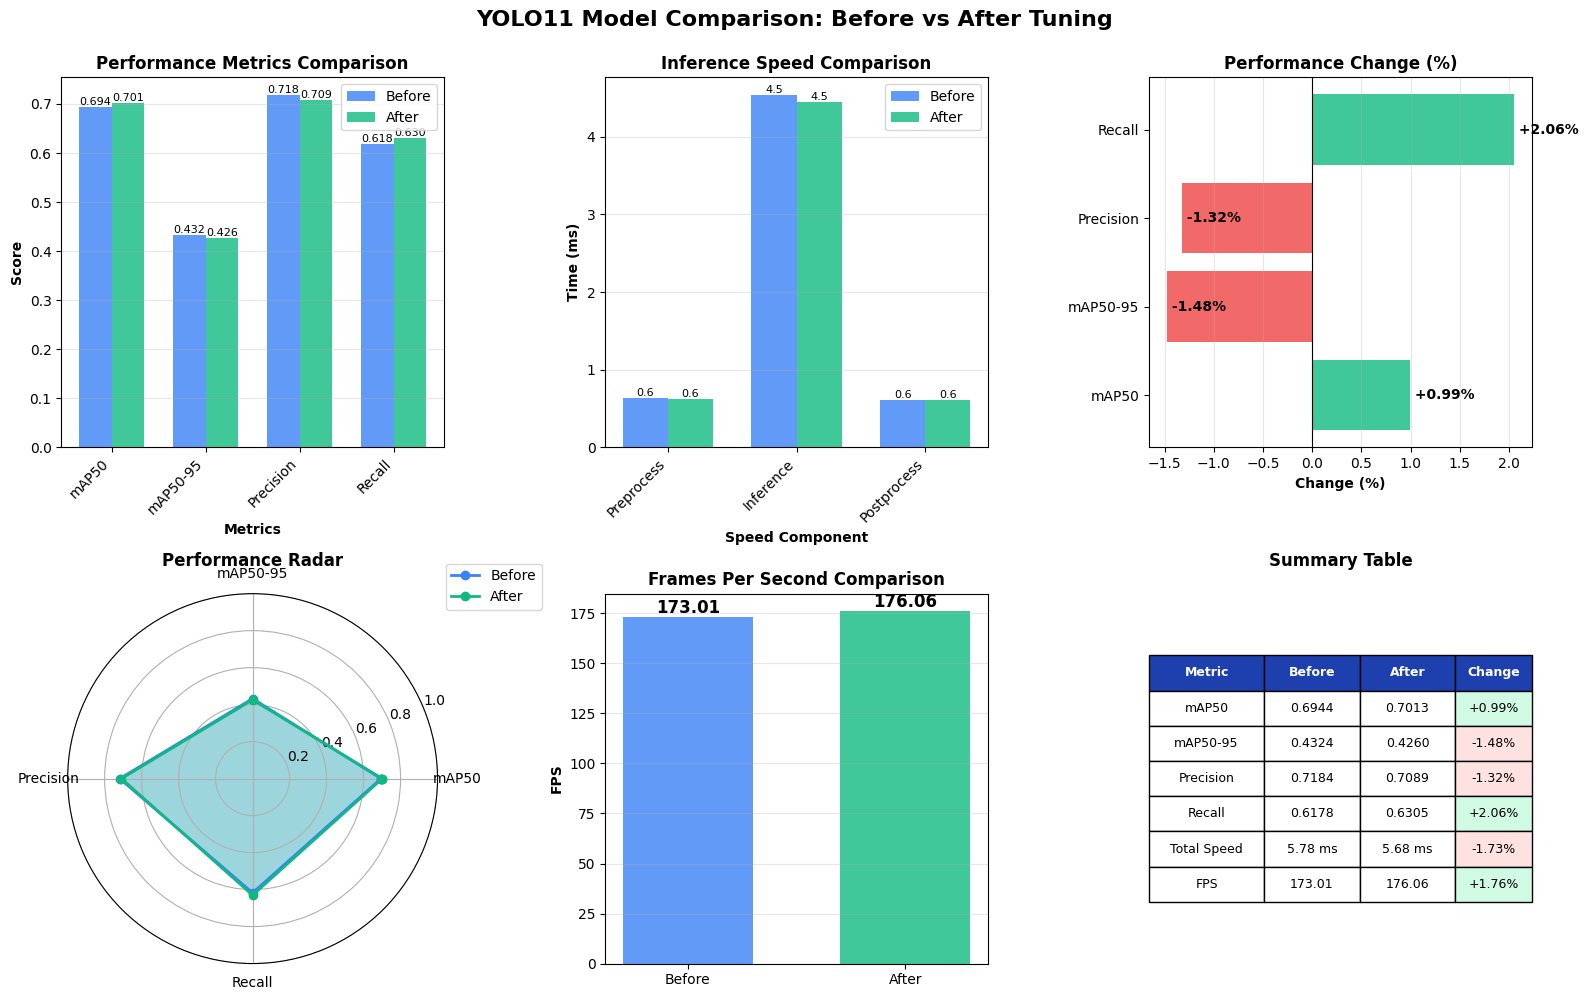

✓ Visualisasi selesai dibuat!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("="*70)
print("PERBANDINGAN YOLO11: BEFORE vs AFTER TUNING")
print("="*70)
print()

# ============================================================
# DATA HASIL EVALUASI (ISI DENGAN HASIL EVALUASI ANDA)
# ============================================================

# MODEL BEFORE TUNING (yolo11_model)
before_map50 = 0.6944        # mAP50 from test evaluation
before_map50_95 = 0.4324     # mAP50-95 from test evaluation
before_precision = 0.7184    # Precision from test evaluation
before_recall = 0.6178       # Recall from test evaluation
before_preprocess = 0.63     # Preprocess speed (ms)
before_inference = 4.54      # Inference speed (ms)
before_postprocess = 0.61    # Postprocess speed (ms)

# MODEL AFTER TUNING (yolo11_tuned)
after_map50 = 0.7013         # mAP50 from test evaluation
after_map50_95 = 0.4260      # mAP50-95 from test evaluation
after_precision = 0.7089     # Precision from test evaluation
after_recall = 0.6305        # Recall from test evaluation
after_preprocess = 0.62      # Preprocess speed (ms)
after_inference = 4.45       # Inference speed (ms)
after_postprocess = 0.61     # Postprocess speed (ms)

# ============================================================
# KALKULASI PERUBAHAN
# ============================================================
def calculate_change(before, after):
    """Hitung persentase perubahan"""
    if before == 0:
        return 0
    return ((after - before) / before) * 100

def get_status(change):
    """Dapatkan status perubahan"""
    if change > 0:
        return "✓ MENINGKAT", "🟢"
    elif change < 0:
        return "✗ MENURUN", "🔴"
    else:
        return "= SAMA", "🟡"

# Hitung perubahan untuk setiap metrik
changes = {
    'mAP50': calculate_change(before_map50, after_map50),
    'mAP50-95': calculate_change(before_map50_95, after_map50_95),
    'Precision': calculate_change(before_precision, after_precision),
    'Recall': calculate_change(before_recall, after_recall),
    'Preprocess': calculate_change(before_preprocess, after_preprocess),
    'Inference': calculate_change(before_inference, after_inference),
    'Postprocess': calculate_change(before_postprocess, after_postprocess)
}

# Hitung total speed dan FPS
before_total_speed = before_preprocess + before_inference + before_postprocess
after_total_speed = after_preprocess + after_inference + after_postprocess
before_fps = 1000 / before_total_speed if before_total_speed > 0 else 0
after_fps = 1000 / after_total_speed if after_total_speed > 0 else 0

# ============================================================
# TABEL PERBANDINGAN
# ============================================================
print("\n" + "="*70)
print("📊 HASIL PERBANDINGAN")
print("="*70)

print("\n1️⃣  METRICS PERFORMA:")
print("-"*70)
print(f"{'Metric':<15} {'Before':<12} {'After':<12} {'Change':<15} {'Status':<20}")
print("-"*70)

metrics_data = [
    ('mAP50', before_map50, after_map50, changes['mAP50']),
    ('mAP50-95', before_map50_95, after_map50_95, changes['mAP50-95']),
    ('Precision', before_precision, after_precision, changes['Precision']),
    ('Recall', before_recall, after_recall, changes['Recall'])
]

for metric, before, after, change in metrics_data:
    status, icon = get_status(change)
    print(f"{metric:<15} {before:<12.4f} {after:<12.4f} {change:>+7.2f}%     {icon} {status}")

print("\n2️⃣  INFERENCE SPEED:")
print("-"*70)
print(f"{'Metric':<15} {'Before':<12} {'After':<12} {'Change':<15} {'Status':<20}")
print("-"*70)

speed_data = [
    ('Preprocess', before_preprocess, after_preprocess, changes['Preprocess']),
    ('Inference', before_inference, after_inference, changes['Inference']),
    ('Postprocess', before_postprocess, after_postprocess, changes['Postprocess']),
    ('Total Speed', before_total_speed, after_total_speed, calculate_change(before_total_speed, after_total_speed)),
    ('FPS', before_fps, after_fps, calculate_change(before_fps, after_fps))
]

for metric, before, after, change in speed_data:
    status, icon = get_status(change)
    unit = " ms" if metric != 'FPS' else " fps"
    print(f"{metric:<15} {before:<12.2f} {after:<12.2f} {change:>+7.2f}%     {icon} {status}")

print("="*70)

# ============================================================
# KESIMPULAN
# ============================================================
print("\n3️⃣  KESIMPULAN:")
print("-"*70)

# Hitung rata-rata improvement
avg_performance_improvement = np.mean([
    changes['mAP50'],
    changes['mAP50-95'],
    changes['Precision'],
    changes['Recall']
])

speed_improvement = calculate_change(before_total_speed, after_total_speed)

print(f"\n📈 Performa Model:")
if avg_performance_improvement > 5:
    print(f"   ✓ Terjadi PENINGKATAN SIGNIFIKAN sebesar {avg_performance_improvement:.2f}%")
elif avg_performance_improvement > 0:
    print(f"   ✓ Terjadi peningkatan moderat sebesar {avg_performance_improvement:.2f}%")
elif avg_performance_improvement > -5:
    print(f"   ≈ Performa relatif STABIL (perubahan {avg_performance_improvement:.2f}%)")
else:
    print(f"   ✗ Terjadi penurunan performa sebesar {avg_performance_improvement:.2f}%")

print(f"\n⚡ Kecepatan Inferensi:")
if speed_improvement < -5:
    print(f"   ✓ Model LEBIH CEPAT {abs(speed_improvement):.2f}%")
    print(f"   ✓ FPS meningkat dari {before_fps:.2f} ke {after_fps:.2f}")
elif speed_improvement < 0:
    print(f"   ✓ Model sedikit lebih cepat ({abs(speed_improvement):.2f}%)")
elif speed_improvement < 5:
    print(f"   ≈ Kecepatan relatif SAMA (perubahan {speed_improvement:.2f}%)")
else:
    print(f"   ✗ Model lebih lambat {speed_improvement:.2f}%")

# Rekomendasi
print(f"\n💡 Rekomendasi:")
if avg_performance_improvement > 0 and speed_improvement <= 5:
    print("   ✓ GUNAKAN MODEL AFTER TUNING!")
    print("   ✓ Model menunjukkan improvement yang baik.")
elif avg_performance_improvement > 0 and speed_improvement > 10:
    print("   ⚠ Pertimbangkan trade-off performa vs kecepatan")
    print("   • Performa meningkat tapi kecepatan menurun")
elif avg_performance_improvement < 0:
    print("   ⚠ PERTAHANKAN MODEL BEFORE TUNING")
    print("   • Tuning tidak memberikan improvement")
else:
    print("   ≈ Kedua model memiliki performa serupa")

print("-"*70)

# ============================================================
# VISUALISASI
# ============================================================
print("\n📊 Membuat visualisasi...")

# Setup figure
fig = plt.figure(figsize=(16, 10))
fig.suptitle('YOLO11 Model Comparison: Before vs After Tuning',
             fontsize=16, fontweight='bold', y=0.995)

# 1. Bar Chart - Performance Metrics
ax1 = plt.subplot(2, 3, 1)
metrics_names = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
before_values = [before_map50, before_map50_95, before_precision, before_recall]
after_values = [after_map50, after_map50_95, after_precision, after_recall]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax1.bar(x - width/2, before_values, width, label='Before', color='#3b82f6', alpha=0.8)
bars2 = ax1.bar(x + width/2, after_values, width, label='After', color='#10b981', alpha=0.8)

ax1.set_xlabel('Metrics', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Performance Metrics Comparison', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_names, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Bar Chart - Speed Comparison
ax2 = plt.subplot(2, 3, 2)
speed_names = ['Preprocess', 'Inference', 'Postprocess']
before_speed_values = [before_preprocess, before_inference, before_postprocess]
after_speed_values = [after_preprocess, after_inference, after_postprocess]

x2 = np.arange(len(speed_names))
bars3 = ax2.bar(x2 - width/2, before_speed_values, width, label='Before', color='#3b82f6', alpha=0.8)
bars4 = ax2.bar(x2 + width/2, after_speed_values, width, label='After', color='#10b981', alpha=0.8)

ax2.set_xlabel('Speed Component', fontweight='bold')
ax2.set_ylabel('Time (ms)', fontweight='bold')
ax2.set_title('Inference Speed Comparison', fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(speed_names, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# 3. Percentage Change Chart
ax3 = plt.subplot(2, 3, 3)
change_names = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
change_values = [changes['mAP50'], changes['mAP50-95'], changes['Precision'], changes['Recall']]
colors = ['#10b981' if v >= 0 else '#ef4444' for v in change_values]

bars5 = ax3.barh(change_names, change_values, color=colors, alpha=0.8)
ax3.set_xlabel('Change (%)', fontweight='bold')
ax3.set_title('Performance Change (%)', fontweight='bold')
ax3.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax3.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars5, change_values)):
    ax3.text(val, i, f' {val:+.2f}%', va='center', fontweight='bold')

# 4. Radar Chart
ax4 = plt.subplot(2, 3, 4, projection='polar')
categories = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
before_radar = [before_map50, before_map50_95, before_precision, before_recall]
after_radar = [after_map50, after_map50_95, after_precision, after_recall]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
before_radar += before_radar[:1]
after_radar += after_radar[:1]
angles += angles[:1]

ax4.plot(angles, before_radar, 'o-', linewidth=2, label='Before', color='#3b82f6')
ax4.fill(angles, before_radar, alpha=0.25, color='#3b82f6')
ax4.plot(angles, after_radar, 'o-', linewidth=2, label='After', color='#10b981')
ax4.fill(angles, after_radar, alpha=0.25, color='#10b981')

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(categories)
ax4.set_ylim(0, 1)
ax4.set_title('Performance Radar', fontweight='bold', pad=20)
ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax4.grid(True)

# 5. FPS Comparison
ax5 = plt.subplot(2, 3, 5)
fps_data = ['Before', 'After']
fps_values = [before_fps, after_fps]
colors_fps = ['#3b82f6', '#10b981']

bars6 = ax5.bar(fps_data, fps_values, color=colors_fps, alpha=0.8, width=0.6)
ax5.set_ylabel('FPS', fontweight='bold')
ax5.set_title('Frames Per Second Comparison', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

for bar in bars6:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 6. Summary Table
ax6 = plt.subplot(2, 3, 6)
ax6.axis('tight')
ax6.axis('off')

summary_data = [
    ['Metric', 'Before', 'After', 'Change'],
    ['mAP50', f'{before_map50:.4f}', f'{after_map50:.4f}', f'{changes["mAP50"]:+.2f}%'],
    ['mAP50-95', f'{before_map50_95:.4f}', f'{after_map50_95:.4f}', f'{changes["mAP50-95"]:+.2f}%'],
    ['Precision', f'{before_precision:.4f}', f'{after_precision:.4f}', f'{changes["Precision"]:+.2f}%'],
    ['Recall', f'{before_recall:.4f}', f'{after_recall:.4f}', f'{changes["Recall"]:+.2f}%'],
    ['Total Speed', f'{before_total_speed:.2f} ms', f'{after_total_speed:.2f} ms', f'{calculate_change(before_total_speed, after_total_speed):+.2f}%'],
    ['FPS', f'{before_fps:.2f}', f'{after_fps:.2f}', f'{calculate_change(before_fps, after_fps):+.2f}%']
]

table = ax6.table(cellText=summary_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.25, 0.25, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header
for i in range(4):
    table[(0, i)].set_facecolor('#1e40af')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style cells based on change
for i in range(1, 7):
    change_text = summary_data[i][3]
    if '+' in change_text:
        table[(i, 3)].set_facecolor('#d1fae5')
    elif change_text.startswith('-'):
        table[(i, 3)].set_facecolor('#fee2e2')

ax6.set_title('Summary Table', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✓ Visualisasi selesai dibuat!")
print("="*70)